In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , Dense , LSTM
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("IMDB Dataset.csv")
dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
dataset.shape

(50000, 2)

In [4]:
encoder = LabelEncoder()
dataset['sentiment'] = encoder.fit_transform(dataset['sentiment'])

In [5]:
dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [6]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
dataset.shape

(49582, 2)

In [9]:
dataset['sentiment'].value_counts()

sentiment
1    24884
0    24698
Name: count, dtype: int64

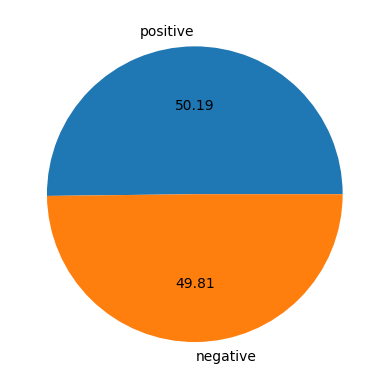

In [10]:
plt.pie(dataset['sentiment'].value_counts() , labels=['positive' , 'negative'] , autopct='%0.2f')
plt.show()

In [11]:
import re

In [12]:
def transformed_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    return text

In [13]:
dataset['review'] = dataset['review'].apply(transformed_text)

In [14]:
dataset.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_data, test_data = train_test_split(dataset , test_size=0.2 , random_state=42)

In [17]:
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(train_data['review'])
x_train_seq = tokenizer.texts_to_sequences(train_data['review'])

x_test_seq = tokenizer.texts_to_sequences(test_data['review'])

In [18]:
maxlen = 200
x_train_padded = pad_sequences(x_train_seq, maxlen=maxlen, padding='post')
x_test_padded = pad_sequences(x_test_seq, maxlen=maxlen, padding='post')

In [19]:
print(x_train_padded[0])

[   9   63  429    1   14  985  166   17  147   10   12   36  560  342
    2  313  125  322  261 4628   16    3  599   10   14   12   73   43
   36 1317   99 1185    9  234  434    5  883  157  406   17    9   88
   55  117   47  325    5  131    9 1453    3  372    4  211   17   60
   81    9   12 2766    3   14   36   11  140   28  221   25  154   49
  125 1957    8   12   20  272   22   38  154    2 2014 1044   83  712
  352   94   38 1273   16    1  166   42   21  174    3  154 1044   14
  351  157    6   10  351  201  133    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [20]:
model = Sequential()
model.add(Embedding(input_dim=5000 , output_dim=128 , input_length = 200 , trainable=True))
model.add(LSTM(128 , dropout=0.2 , recurrent_dropout=0.2 , return_sequences=True))
model.add(LSTM(128 , dropout=0.2 , recurrent_dropout=0.2 , return_sequences=False))
model.build((None, 128))
model.add(Dense(1 , activation='sigmoid'))

c:\Users\rojas\OneDrive\Desktop\DEEP LEARNING\myenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 128, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 903,297 (3.45 MB)

 Trainable params: 903,297 (3.45 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
y_train = train_data['sentiment']
y_test = test_data['sentiment']

In [24]:
model.fit(x_train_padded , y_train , epochs=5 , validation_split=0.2 , batch_size=64)

Epoch 1/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 509s 996ms/step - accuracy: 0.5326 - loss: 0.6851 - val_accuracy: 0.7783 - val_loss: 0.5445
Epoch 2/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 410s 826ms/step - accuracy: 0.7433 - loss: 0.5409 - val_accuracy: 0.7643 - val_loss: 0.5052
Epoch 3/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 428s 862ms/step - accuracy: 0.8003 - loss: 0.4427 - val_accuracy: 0.8697 - val_loss: 0.3148
Epoch 4/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 801s 2s/step - accuracy: 0.8884 - loss: 0.2810 - val_accuracy: 0.8867 - val_loss: 0.2900
Epoch 5/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 392s 791ms/step - accuracy: 0.9102 - loss: 0.2286 - val_accuracy: 0.8900 - val_loss: 0.2782


In [25]:
loss , accuracy = model.evaluate(x_test_padded , y_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.8877 - loss: 0.2831


In [26]:
print("loss : " , loss)
print("accuracy : " , accuracy)

loss :  0.28848838806152344
accuracy :  0.8849450349807739


In [ ]:
def predict_sentiment(review):

    if isinstance(review, str):
        review = [review]

    sequence = tokenizer.texts_to_sequences(review)
    padded_sequence = pad_sequences(sequence , maxlen=200)
    prediction = model.predict(padded_sequence)
 
    print(f"Prediction Value: {prediction[0][0]}")

    sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"

    return sentiment

In [28]:
test_review1 = "This movie was fantastic. I loved it."

predict_sentiment(test_review1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction Value: 0.9755327701568604


'Positive'

In [29]:
test_review3 = "This movie was not that good"
predict_sentiment(test_review3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction Value: 0.5507130026817322


'Negative'

In [30]:
x_test = test_data['review']

In [31]:
for i in range(10):
    review = x_test.iloc[i]
    actual_sentiment = "Positive" if y_test.iloc[i] == 1 else "Negative"
    predicted_sentiment = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Actual Sentiment: {actual_sentiment}")
    print(f"Predicted Sentiment: {predicted_sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Prediction Value: 0.0029169314075261354
Review: "Soul Plane" is a horrible attempt at comedy that only should appeal people with thick skulls, bloodshot eyes and furry pawns. The plot is not only incoherent but also non-existent, acting is mostly sub sub-par with a gang of highly moronic and dreadful characters thrown in for bad measure, jokes are often spotted miles ahead and almost never even a bit amusing. This movie lacks any structure and is full of racial stereotypes that must have seemed old even in the fifties, the only thing it really has going for it is some pretty ladies, but really, if you want that you can rent something from the "Adult" section. OK?I can hardly see anything here to recommend since you'll probably have a lot a better and productive time chasing rats with a sledgehammer or inventing waterproof teabags or whatever.2/10
Actual Sentiment: Negative
Predicted Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predict